In [11]:
from PIL import Image
from PIL import ImageFilter
import numpy as np
import cv2
from matplotlib import pyplot as plt

### Display the images

In [12]:
dataset = '/Users/prabh27/CMU/Summer2020/99520/clouds/luojia1_dataset/all_images/'
#folder = 'LuoJia1-01_LR201806304569_20180629210840_HDR_0037/'
#img_path = dataset + folder + 'LuoJia1-01_LR201806304569_20180629210840_HDR_0037_gec.tif'
img_path = dataset + '1.tif'

In [13]:
image = Image.open(img_path)
print(image.format)
print(image.size)
print(image.mode)

TIFF
(3180, 2078)
I


In [10]:
array = np.array(image)
image.save('testgrey.png')

### Low Pass filters to remove the high frequency content (edges, noises, etc.)

### Averaging Filter

In [5]:
# tiff image does not work directly, save as png using np.array() and then use cv2.

img = cv2.imread('testgrey.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

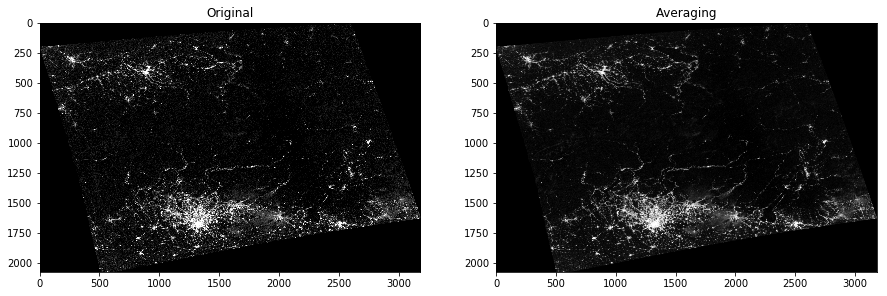

In [6]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(img)
ax1.title.set_text('Original')
ax2.imshow(dst)
ax2.title.set_text('Averaging')

### Gaussian Filter

In [72]:
img = cv2.imread('testgrey.png')
blur = cv2.blur(img,(5,5))


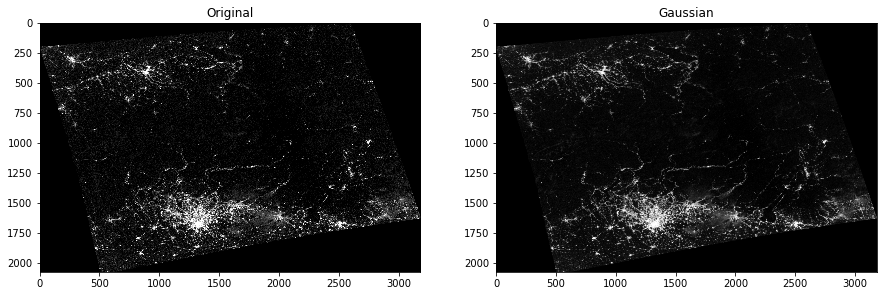

In [73]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(img)
ax1.title.set_text('Original')
ax2.imshow(blur)
ax2.title.set_text('Gaussian')

### Median Filtering

In [111]:
median = cv2.medianBlur(img, 5)

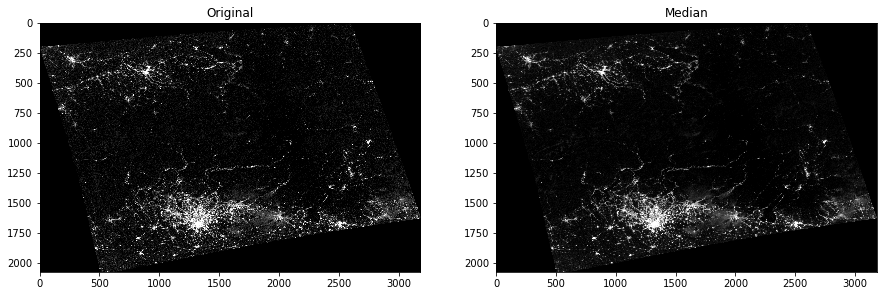

In [75]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(img)
ax1.title.set_text('Original')
ax2.imshow(median)
ax2.title.set_text('Median')

### Thresholding to remove the bright spots (streetlights)

### Show all the streetlights

In [76]:
thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY)[1]

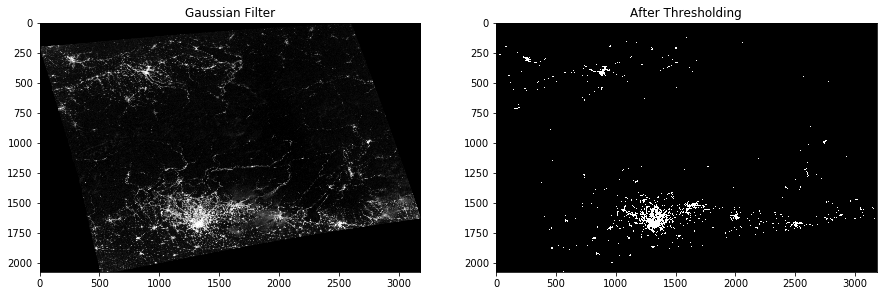

In [77]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(blur)
ax1.title.set_text('Gaussian Filter')
ax2.imshow(thresh)
ax2.title.set_text('After Thresholding')

### Remove all the streetlights

In [78]:
thresh = cv2.threshold(blur, 150, 255, cv2.THRESH_BINARY_INV)[1]

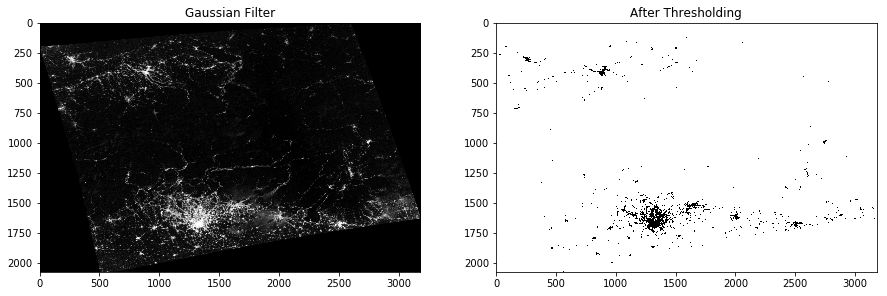

In [79]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(blur)
ax1.title.set_text('Gaussian Filter')
ax2.imshow(thresh)
ax2.title.set_text('After Thresholding')

### Unsharp Mask

Unsharp masking works in two steps:

1) Get the Laplacian (second derivative) of your image.

2) Take away the Laplacian (or a fraction of it) from the original image.

In [88]:
# Calculate the Laplacian
lap = cv2.Laplacian(median, cv2.CV_64F)

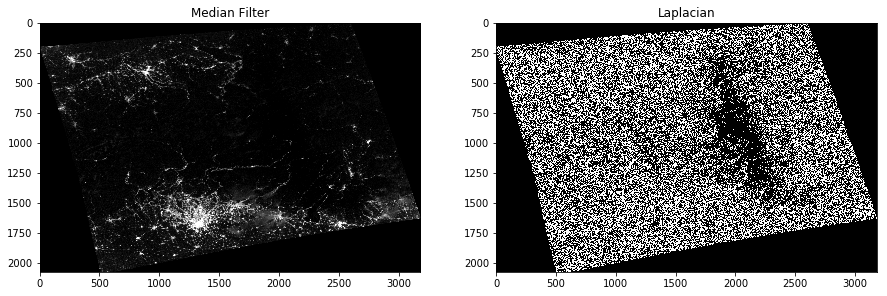

In [91]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(median)
ax1.title.set_text('Median Filter')
ax2.imshow(lap)
ax2.title.set_text('Laplacian')

In [100]:
sharp = median - 0.3*lap

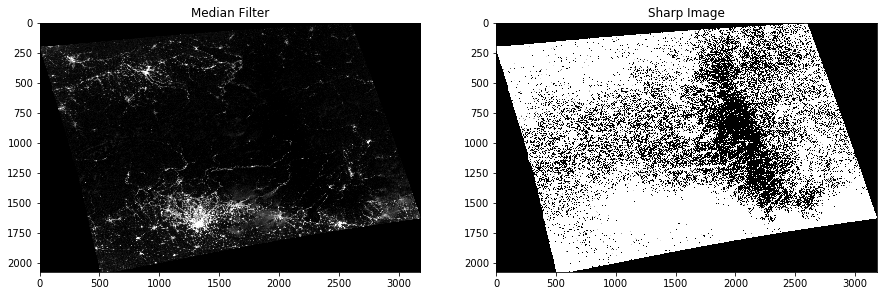

In [101]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(median)
ax1.title.set_text('Median Filter')
ax2.imshow(sharp)
ax2.title.set_text('Sharp Image')

### Unsharp Mask is good at removing all the streetlights from the image

### Apply averaging filter to smoothen the image

In [129]:
kernel = np.ones((5,5),np.float32)/25
smooth = cv2.filter2D(sharp,-1,kernel)

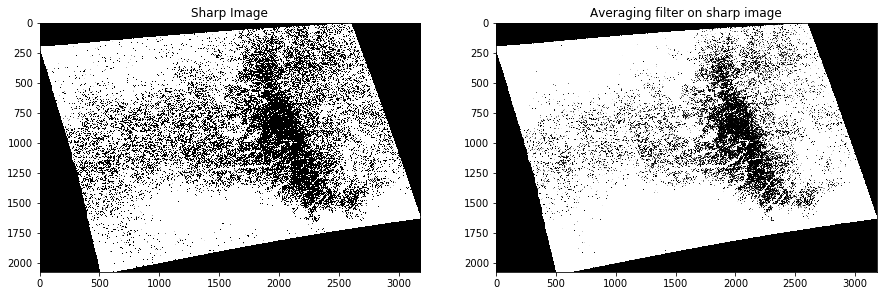

In [130]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(sharp)
ax1.title.set_text('Sharp Image')
ax2.imshow(smooth)
ax2.title.set_text('Averaging filter on sharp image')

### Inversion of black and white

In [150]:
thresh = cv2.threshold(smooth, 2, 255, cv2.THRESH_BINARY_INV)[1]

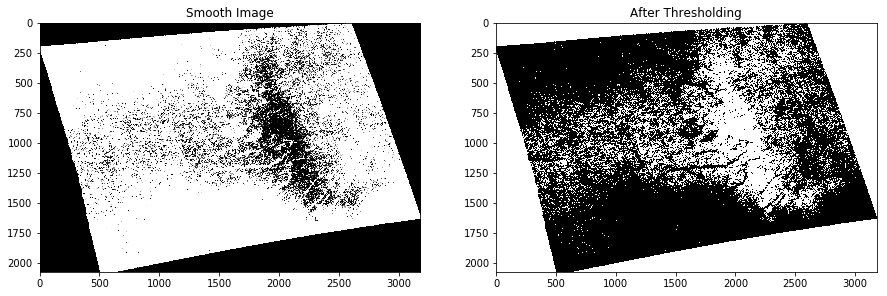

In [154]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(smooth)
ax1.title.set_text('Smooth Image')
ax2.imshow(thresh)
ax2.title.set_text('After Thresholding')

### Applying Closing on the above threshold image

In [156]:
kernel = np.ones((9,9))
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

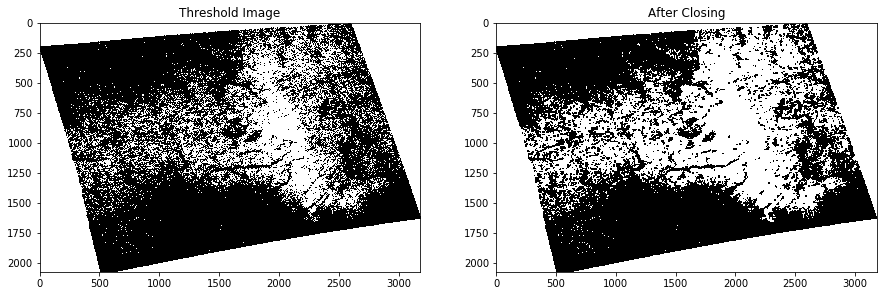

In [157]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(thresh)
ax1.title.set_text('Threshold Image')
ax2.imshow(closing)
ax2.title.set_text('After Closing')

### Let's erode and dilate the image to filter the clouds only

In [108]:
kernel = np.ones((5,5))
erosion = cv2.erode(sharp, kernel, iterations = 5)

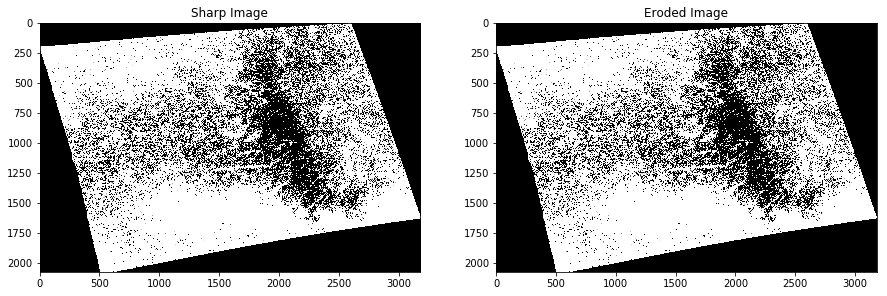

In [109]:
f = plt.figure(figsize=(15, 5))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)
ax1.imshow(sharp)
ax1.title.set_text('Sharp Image')
ax2.imshow(sharp)
ax2.title.set_text('Eroded Image')